# **Malaysia Public Transport Optimization**

This notebook focuses on enhancing the ridership dataset through **Data Transformation and Feature Engineering**. It includes:
- Deriving new features such as total ridership and time-based attributes (e.g., year, month)
- Aggregating ridership data to reveal monthly trends across transport modes
- Analyzing mode-specific ridership behaviors using statistical summaries and correlation matrices

The end product is to reshape and enrich the dataset for better pattern discovery and prepare it for advanced modeling and visualization tasks in the next phase.




## **Data Transformation**

### Import dataset and libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir("C:/Users/lunwe/Desktop/Malaysia-Public-Transport-Optimization")

In [4]:
df = pd.read_csv("data/processed/ridership_cleaned.csv")
df.head()

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter,total_ridership
0,2019-01-01,NaN,NaN,NaN,113357,114173,139634,35804,0.0,NaN,NaN,NaN,NaN,NaN,402968.0
1,2019-01-02,NaN,NaN,NaN,182715,169316,274224,31859,0.0,NaN,NaN,NaN,NaN,NaN,658114.0
2,2019-01-03,NaN,NaN,NaN,187904,175304,286469,31893,0.0,NaN,NaN,NaN,NaN,NaN,681570.0
3,2019-01-04,NaN,NaN,NaN,198420,187891,304755,34121,0.0,NaN,NaN,NaN,NaN,NaN,725187.0
4,2019-01-05,NaN,NaN,NaN,120773,112660,145036,29950,0.0,NaN,NaN,NaN,NaN,NaN,408419.0


In [5]:
# Changing date column to datetime format

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2373 non-null   datetime64[ns]
 1   bus_rkl             1277 non-null   float64       
 2   bus_rkn             1277 non-null   float64       
 3   bus_rpn             1277 non-null   float64       
 4   rail_lrt_ampang     2373 non-null   int64         
 5   rail_mrt_kajang     2373 non-null   int64         
 6   rail_lrt_kj         2373 non-null   int64         
 7   rail_monorail       2373 non-null   int64         
 8   rail_mrt_pjy        2373 non-null   float64       
 9   rail_ets            1720 non-null   float64       
 10  rail_intercity      1720 non-null   float64       
 11  rail_komuter_utara  1720 non-null   float64       
 12  rail_tebrau         1108 non-null   float64       
 13  rail_komuter        660 non-null    float64     

In [6]:
df.head(5)

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter,total_ridership
0,2019-01-01,NaN,NaN,NaN,113357,114173,139634,35804,0.0,NaN,NaN,NaN,NaN,NaN,402968.0
1,2019-01-02,NaN,NaN,NaN,182715,169316,274224,31859,0.0,NaN,NaN,NaN,NaN,NaN,658114.0
2,2019-01-03,NaN,NaN,NaN,187904,175304,286469,31893,0.0,NaN,NaN,NaN,NaN,NaN,681570.0
3,2019-01-04,NaN,NaN,NaN,198420,187891,304755,34121,0.0,NaN,NaN,NaN,NaN,NaN,725187.0
4,2019-01-05,NaN,NaN,NaN,120773,112660,145036,29950,0.0,NaN,NaN,NaN,NaN,NaN,408419.0


### **Feature Engineering**

### Date-Based Features

In [8]:
# Create additional date-based features

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.dayofweek
df['is_weekend'] = df['weekday'].isin([5, 6])

In [9]:
df.head(10)

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter,total_ridership,year,month,weekday,is_weekend
0,2019-01-01,NaN,NaN,NaN,113357,114173,139634,35804,0.0,NaN,NaN,NaN,NaN,NaN,402968.0,2019,1,1,False
1,2019-01-02,NaN,NaN,NaN,182715,169316,274224,31859,0.0,NaN,NaN,NaN,NaN,NaN,658114.0,2019,1,2,False
2,2019-01-03,NaN,NaN,NaN,187904,175304,286469,31893,0.0,NaN,NaN,NaN,NaN,NaN,681570.0,2019,1,3,False
3,2019-01-04,NaN,NaN,NaN,198420,187891,304755,34121,0.0,NaN,NaN,NaN,NaN,NaN,725187.0,2019,1,4,False
4,2019-01-05,NaN,NaN,NaN,120773,112660,145036,29950,0.0,NaN,NaN,NaN,NaN,NaN,408419.0,2019,1,5,True
5,2019-01-06,NaN,NaN,NaN,101145,95913,120032,25342,0.0,NaN,NaN,NaN,NaN,NaN,342432.0,2019,1,6,True
6,2019-01-07,NaN,NaN,NaN,197569,184365,301290,31988,0.0,NaN,NaN,NaN,NaN,NaN,715212.0,2019,1,0,False
7,2019-01-08,NaN,NaN,NaN,196879,185920,304680,31792,0.0,NaN,NaN,NaN,NaN,NaN,719271.0,2019,1,1,False
8,2019-01-09,NaN,NaN,NaN,197314,188770,307069,32305,0.0,NaN,NaN,NaN,NaN,NaN,725458.0,2019,1,2,False
9,2019-01-10,NaN,NaN,NaN,198876,189818,310510,32057,0.0,NaN,NaN,NaN,NaN,NaN,731261.0,2019,1,3,False


### Aggregation

From the dataset, we identified three distinct clusters of transport modes that exhibit similar ridership behavior: Rapid Bus Services, Urban Rail Services, and National Rail Services.

Leveraging these insights, we engineered three new aggregate features — **total_rapidbus, total_urbanrail, and total_nationalrail** — by summing the daily ridership values within each cluster. This aggregation simplifies the dataset while preserving meaningful patterns, enabling more effective analysis and modeling in subsequent steps.

In [12]:
# Rapid Bus
bus_cols = ['bus_rkl', 'bus_rpn', 'bus_rkn']
df['total_rapidbus'] = df[bus_cols].sum(axis=1)

# Urban Rail (LRT, MRT, Monorail)
urban_rail_cols = ['rail_lrt_kj', 'rail_lrt_ampang', 'rail_monorail', 'rail_mrt_kajang', 'rail_mrt_pjy']
df['total_urbanrail'] = df[urban_rail_cols].sum(axis=1)

# National Rail (KTM & others)
national_rail_cols = ['rail_komuter', 'rail_komuter_utara', 'rail_ets', 'rail_tebrau', 'rail_intercity']
df['total_nationalrail'] = df[national_rail_cols].sum(axis=1)

In [13]:
df[['date', 'total_rapidbus', 'total_urbanrail', 'total_nationalrail']].head()

,date,total_rapidbus,total_urbanrail,total_nationalrail
0,2019-01-01,0.0,402968.0,0.0
1,2019-01-02,0.0,658114.0,0.0
2,2019-01-03,0.0,681570.0,0.0
3,2019-01-04,0.0,725187.0,0.0
4,2019-01-05,0.0,408419.0,0.0


In [14]:
df.head()

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,...,rail_tebrau,rail_komuter,total_ridership,year,month,weekday,is_weekend,total_rapidbus,total_urbanrail,total_nationalrail
0,2019-01-01,NaN,NaN,NaN,113357,114173,139634,35804,0.0,NaN,...,NaN,NaN,402968.0,2019,1,1,False,0.0,402968.0,0.0
1,2019-01-02,NaN,NaN,NaN,182715,169316,274224,31859,0.0,NaN,...,NaN,NaN,658114.0,2019,1,2,False,0.0,658114.0,0.0
2,2019-01-03,NaN,NaN,NaN,187904,175304,286469,31893,0.0,NaN,...,NaN,NaN,681570.0,2019,1,3,False,0.0,681570.0,0.0
3,2019-01-04,NaN,NaN,NaN,198420,187891,304755,34121,0.0,NaN,...,NaN,NaN,725187.0,2019,1,4,False,0.0,725187.0,0.0
4,2019-01-05,NaN,NaN,NaN,120773,112660,145036,29950,0.0,NaN,...,NaN,NaN,408419.0,2019,1,5,True,0.0,408419.0,0.0


In [15]:
df.shape

(2373, 22)

## **Post Transformation EDA**

### Comparison between weekend and weekday average ridership

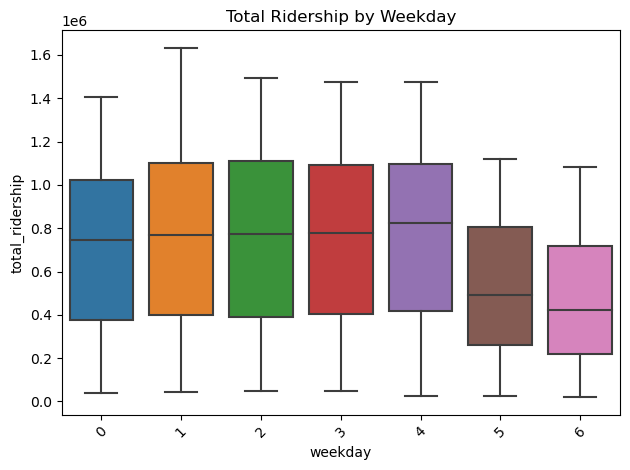

In [17]:
sns.boxplot(x='weekday', y='total_ridership', data=df)
plt.title("Total Ridership by Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

To further understand behavioral patterns in public transport usage, we analyzed ridership across different days and months.

**Weekend vs Weekday**: **Total ridership** drops significantly on weekends refering to **Saturday and Sunday**, suggesting a heavy reliance on weekday commuters. 

### Percentage drop between weekend and weekday average ridership

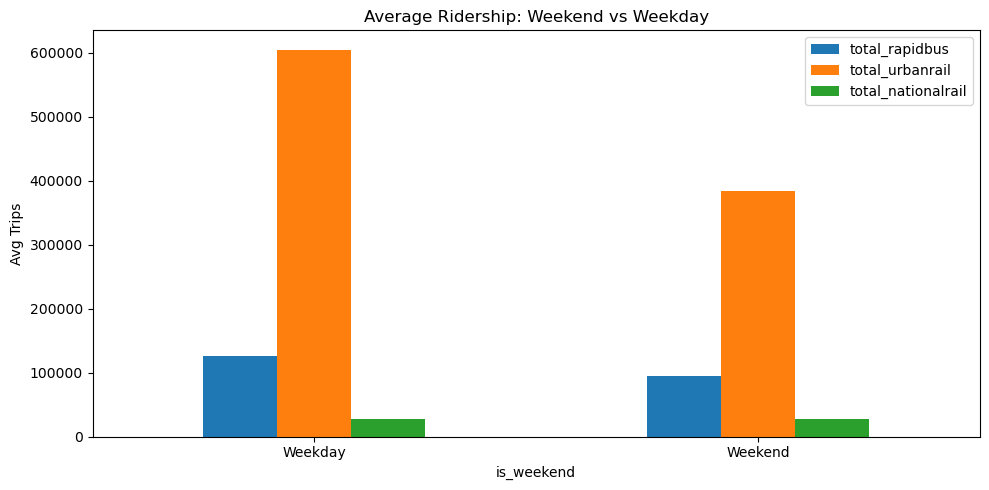

In [20]:
# Compare weekend vs weekday for each transport cluster
weekend_group = df.groupby('is_weekend')[['total_rapidbus', 'total_urbanrail', 'total_nationalrail']].mean()

weekend_group.plot(kind='bar', figsize=(10,5))
plt.title("Average Ridership: Weekend vs Weekday")
plt.ylabel("Avg Trips")
plt.xticks([0,1], ['Weekday', 'Weekend'], rotation=0)
plt.tight_layout()
plt.show()

In [21]:
# Add new time-based columns if not done yet
df['weekday'] = df['date'].dt.day_name()
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])

# Group by is_weekend
week_stats = df.groupby('is_weekend')[['total_rapidbus', 'total_urbanrail', 'total_nationalrail']].mean()

# Rename for clarity
week_stats.index = ['Weekday', 'Weekend']
print("Average Ridership:\n", week_stats)

# Calculate % drop from weekday to weekend
percentage_drop = ((week_stats.loc['Weekday'] - week_stats.loc['Weekend']) / week_stats.loc['Weekday']) * 100
percentage_drop = percentage_drop.round(2)
print("\nPercentage Drop from Weekday to Weekend:\n",percentage_drop)

Average Ridership:
          total_rapidbus  total_urbanrail  total_nationalrail
Weekday   126483.061947    604759.976401        28223.403540
Weekend    95078.138643    383950.402655        27690.179941

Percentage Drop from Weekday to Weekend:
 total_rapidbus        24.83
total_urbanrail       36.51
total_nationalrail     1.89
dtype: float64


**Compared to weekdays:**

- **Urban rail ridership** drops by approximately **36.5%** on weekends — a clear indicator of weekday commuter dominance.
- **Rapid bus ridership** shows a moderate **24.8%** drop, suggesting it’s also heavily used for weekday commuting, though less pronounced than rail.
- **National rail services** show **only a 1.9% decrease** on weekends — indicating relatively stable demand, possibly driven by both work and leisure intercity travel. -- **Clearer insights of natioal rail service are investigate on next sections.**

### Average Monthly Ridership Patterns by Transport Cluster

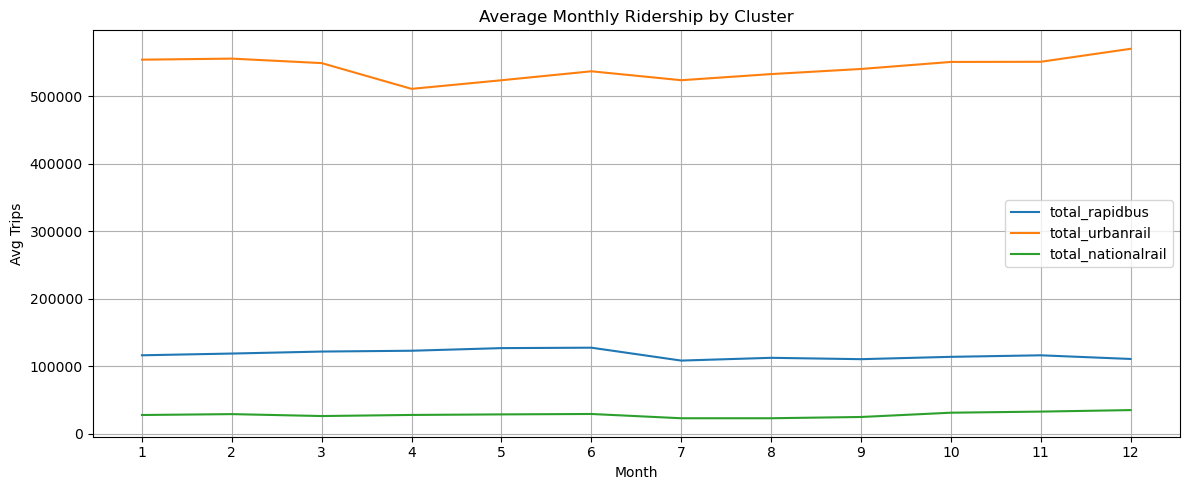

In [24]:
# Group by month and average
monthly_avg = df.groupby(df['month'])[['total_rapidbus', 'total_urbanrail', 'total_nationalrail']].mean()

monthly_avg.plot(figsize=(12,5))
plt.title("Average Monthly Ridership by Cluster")
plt.xlabel("Month")
plt.ylabel("Avg Trips")
plt.grid(True)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

As shown in the previous plot, Urban Rail accounts for the majority of ridership, averaging over **500,000 trips per month**. This is followed by Rapid Bus services, with an average of above 100,000 trips, while National Rail services record the lowest usage, averaging below 100,000 trips per month.

### Discovery of Relationship between Rapid KL bus and Intercity Rail

In [27]:
df['DayType'] = df['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

# Compare average usage
df.groupby('DayType')[['bus_rkl', 'rail_intercity']].mean()

,bus_rkl,rail_intercity
DayType,,
Weekday,192688.118551,2742.902280
Weekend,136099.827869,3834.325203


- **`bus_rkl`** sees higher ridership on **weekdays** (~192K) — likely due to daily commuting patterns.
- **`rail_intercity`** records higher usage on **weekends** (~3.8K vs 2.7K) — suggesting intercity or leisure travel.
- This indicates **urban buses** support routine weekday mobility, while **intercity trains** are favored for weekend travel. To perform and discover deeper analysis, Scatterplot will be utilized.


#### Scatterplot

C:\Users\lunwe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


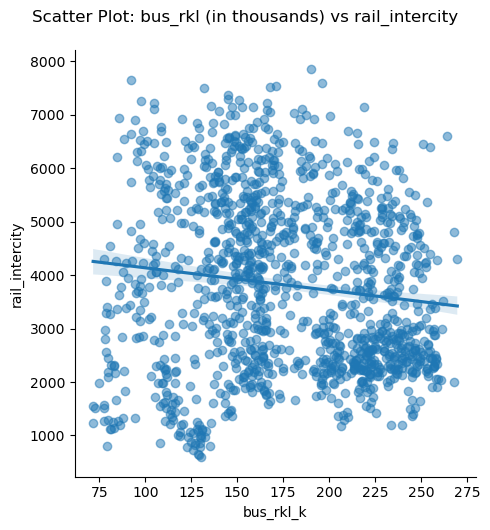

In [30]:
df_temp = df.assign(bus_rkl_k=df['bus_rkl'] / 1000)

plot = sns.lmplot(
    data=df_temp,
    x='bus_rkl_k',
    y='rail_intercity',
    scatter_kws={'alpha': 0.5}
)

plot.fig.suptitle("Scatter Plot: bus_rkl (in thousands) vs rail_intercity", x=0.5, y=1.05)
plt.show()

This scatterplot visualizes the overall relationship between **`bus_rkl`** and **`rail_intercity`**, which initially shows a **weak negative linear correlation** (Pearson r = –0.13). To further investigate and validate this relationship, the data is later separated by **`DayType`** (weekday vs weekend) to explore whether different patterns emerge across different travel contexts.

C:\Users\lunwe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


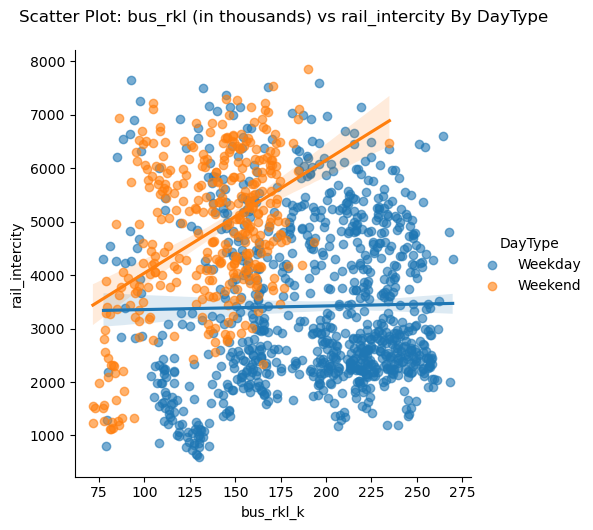

In [32]:
plot = sns.lmplot(data=df_temp, x='bus_rkl_k', y='rail_intercity', hue='DayType', scatter_kws={'alpha': 0.6})
plot.fig.suptitle("Scatter Plot: bus_rkl (in thousands) vs rail_intercity By DayType", x=0.5,y=1.05)
plt.show()

When splitting the data by **`DayType`**, the relationship between **`bus_rkl`** and **`rail_intercity`** becomes ambiguous.
- On **weekends**, most data points cluster at lower **bus_rkl** ridership levels, with slightly higher **rail_intercity** values — possibly reflecting increased intercity travel.
- On **weekdays**, the spread of **bus_rkl** is wider, but **rail_intercity** remains relatively low, indicating distinct usage patterns.

Despite this, **both lines in the scatterplot trend slightly upward**, contradicting the earlier overall negative correlation. This suggests that after separating by day type, the **linear relationship is weak and inconclusive**, and may not indicate meaningful substitution between the two transport modes.
<br>

#### Scatter Plot Conclusion

In the nutshell, **Although a weak negative correlation (–0.13)** exists between **`bus_rkl`** and **`rail_intercity`**, the scatter plot shows ambiguous trends — especially when split by DayType, where the relationship appears slightly positive within each group.
Therefore, **no meaningful or causal relationship** can be concluded between these two transport modes at this stage, there is **insufficient evidence** to suggest a substitution effect between urban bus and intercity rail ridership."

Due to this ambiguity and lack of strong evidence, **no further investigation** is pursued for this pair at this stage acting opposite travel intents.


### **Summary**

- **Time Columns Created**: Extracted `year`, `month`, `weekday`, `is_weekend` for temporal analysis.
- **Mode Clustering**: Grouped transport lines into 3 clusters — `total_rapidbus`, `total_urbanrail`, `total_nationalrail`, for better understanding.
- **Key Insights**:
  - Weekend ridership drops significantly, especially for urban rail.
  - Weekday patterns dominate due to work-related travel.
  - Monthly patterns reflect seasonality and events like COVID-19.
- **Relationship Discovery**:
  - **Weak negative correlation (–0.13)** between `bus_rkl` and `rail_intercity`.
  - No strong link found after separating by weekend/weekday.

### **Export Transformed Data**

In [37]:
df.to_csv("data/processed/ridership_transformed.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'data/processed/ridership_transformed.csv'